<a href="https://colab.research.google.com/github/lafunes/Machine_Learning/blob/main/Hw5_ML_FunesVelasquez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/ML/Assignment 5')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
file_path2 = '/content/gdrive/My Drive/ML/Assignment 5/Housing.csv'
Housing = pd.DataFrame(pd.read_csv(file_path2))
Housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [ ]:
import torch
from torch import nn
from torch.optim import SGD, Adam

# Given data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

# Reshaping the input data
t_u = t_u.unsqueeze(1)
t_c = t_c.unsqueeze(1)

# Define the non-linear model
class NonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w2 = nn.Parameter(torch.ones(1, 1))
        self.w1 = nn.Parameter(torch.ones(1, 1))
        self.b = nn.Parameter(torch.zeros(1, 1))

    def forward(self, t_u):
        return self.w2 * t_u ** 2 + self.w1 * t_u + self.b

# Training function
def train(model, t_u, t_c, optimizer, num_epochs, learning_rate):
    for epoch in range(1, num_epochs + 1):
        t_p = model(t_u)
        loss = ((t_p - t_c) ** 2).mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Loss {loss.item()}")

# Initialize the model
model_sgd = NonLinearModel()
model_adam = NonLinearModel()

# Define learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Train with SGD and Adam, each with different learning rates
results = []
for lr in learning_rates:
    # Clone models to start fresh for each learning rate
    model_sgd = NonLinearModel()
    model_adam = NonLinearModel()

    # Optimizers
    optimizer_sgd = SGD(model_sgd.parameters(), lr=lr)
    optimizer_adam = Adam(model_adam.parameters(), lr=lr)

    # Train and collect results for SGD
    print(f"Training with SGD, Learning Rate: {lr}")
    train(model_sgd, t_u, t_c, optimizer_sgd, num_epochs=5000, learning_rate=lr)

    # Train and collect results for Adam
    print(f"Training with Adam, Learning Rate: {lr}")
    train(model_adam, t_u, t_c, optimizer_adam, num_epochs=5000, learning_rate=lr)

    results.append({
        'learning_rate': lr,
        'sgd_loss': ((model_sgd(t_u) - t_c) ** 2).mean().item(),
        'adam_loss': ((model_adam(t_u) - t_c) ** 2).mean().item()
    })

results


Training with SGD, Learning Rate: 0.1
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Training with Adam, Learning Rate: 0.1
Epoch 500, Loss 4.84450101852417
Epoch 1000, Loss 3.7856438159942627
Epoch 1500, Loss 3.4666762351989746
Epoch 2000, Loss 3.406404972076416
Epoch 2500, Loss 3.3779754638671875
Epoch 3000, Loss 3.344334602355957
Epoch 3500, Loss 3.3019208908081055
Epoch 4000, Loss 3.249140977859497
Epoch 4500, Loss 3.184417963027954
Epoch 5000, Loss 3.1063530445098877
Training with SGD, Learning Rate: 0.01
Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan
Training with Adam, Learning Rate: 0.01
Epoch 500, Loss 6.1086931228637695
Epoch 1000, Loss 5.984358310699463
Epo

[{'learning_rate': 0.1, 'sgd_loss': nan, 'adam_loss': 3.106184244155884},
 {'learning_rate': 0.01, 'sgd_loss': nan, 'adam_loss': 3.8322129249572754},
 {'learning_rate': 0.001, 'sgd_loss': nan, 'adam_loss': 6.038330554962158},
 {'learning_rate': 0.0001, 'sgd_loss': nan, 'adam_loss': 3405665.75}]

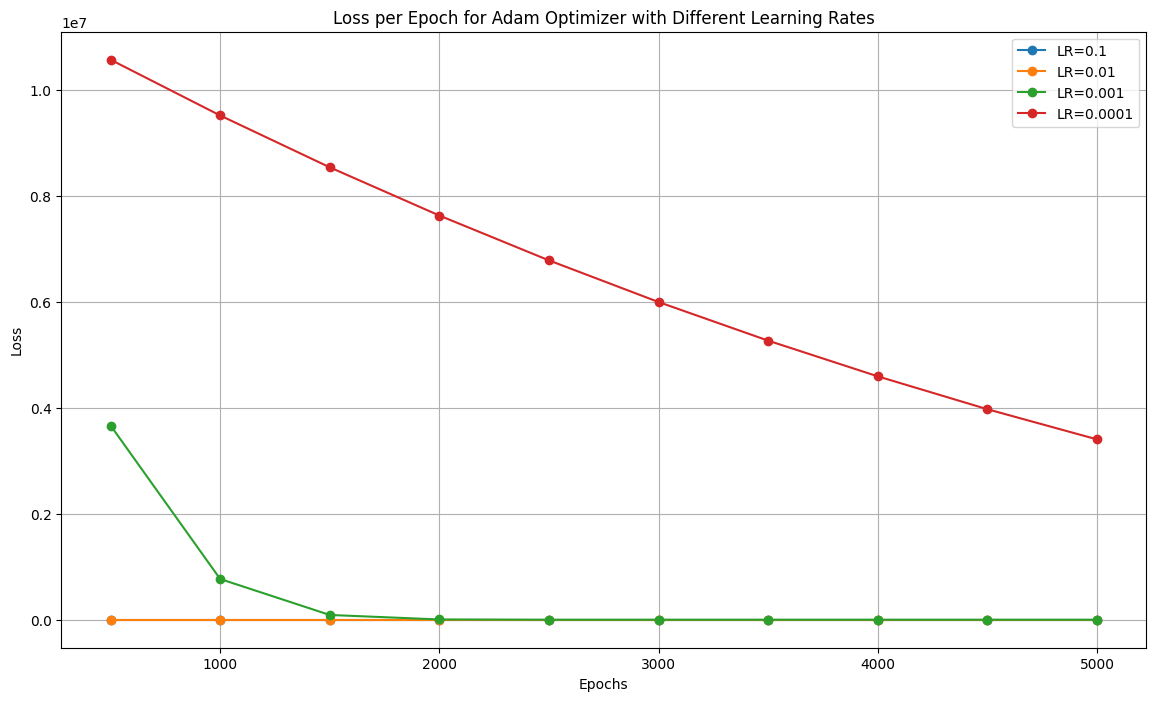

In [ ]:
import torch
from torch import nn
from torch.optim import SGD, Adam
import matplotlib.pyplot as plt

# Define the non-linear model
class NonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w2 = nn.Parameter(torch.ones(1, 1))
        self.w1 = nn.Parameter(torch.ones(1, 1))
        self.b = nn.Parameter(torch.zeros(1, 1))

    def forward(self, t_u):
        return self.w2 * t_u ** 2 + self.w1 * t_u + self.b

# Training function modified to return losses for plotting
def train_and_return_losses(model, t_u, t_c, optimizer, num_epochs):
    losses = []
    for epoch in range(1, num_epochs + 1):
        t_p = model(t_u)
        loss = ((t_p - t_c) ** 2).mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            losses.append(loss.item())
    return losses

# Given data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

# Define learning rates
learning_rates = [0.1, 0.01, 0.001, 0.0001]

# Initialize arrays to store losses for Adam optimizer
losses_adam = {
    0.1: [],
    0.01: [],
    0.001: [],
    0.0001: []
}

# Train with Adam optimizer and collect losses for plotting
for lr in learning_rates:
    model_adam = NonLinearModel()
    optimizer_adam = Adam(model_adam.parameters(), lr=lr)
    losses_adam[lr] = train_and_return_losses(model_adam, t_u, t_c, optimizer_adam, num_epochs=5000)

# Plotting the results
plt.figure(figsize=(14, 8))
for lr, losses in losses_adam.items():
    epochs = range(500, 5001, 500)
    plt.plot(epochs, losses, marker='o', label=f'LR={lr}')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss per Epoch for Adam Optimizer with Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()


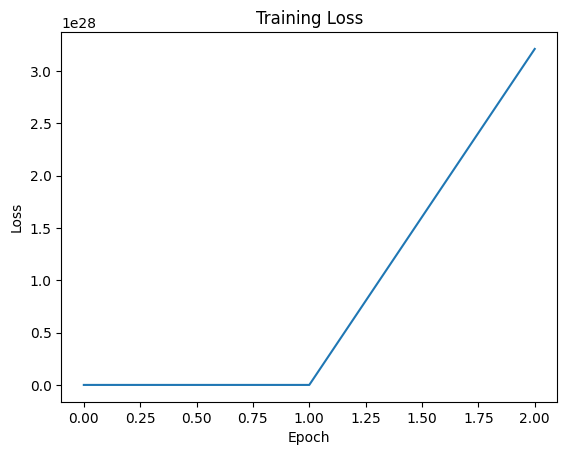

In [ ]:
#Problem 1C

import torch
from torch import nn
from torch.optim import SGD, Adam
import matplotlib.pyplot as plt

# Given data
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c).unsqueeze(1)
t_u = torch.tensor(t_u).unsqueeze(1)

# Define the non-linear model
class NonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.w2 = nn.Parameter(torch.ones(1, 1))
        self.w1 = nn.Parameter(torch.ones(1, 1))
        self.b = nn.Parameter(torch.zeros(1, 1))

    def forward(self, t_u):
        return self.w2 * t_u ** 2 + self.w1 * t_u + self.b

# Initialize the model
model = NonLinearModel()

# Optimizer
optimizer = SGD(model.parameters(), lr=0.01)

# Track losses
losses = []

# Training function
def train(model, t_u, t_c, optimizer, num_epochs):
    for epoch in range(1, num_epochs + 1):
        t_p = model(t_u)
        loss = ((t_p - t_c) ** 2).mean()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    return losses

# Train the model
train_losses = train(model, t_u, t_c, optimizer, num_epochs=5000)

# Plot the training loss
plt.plot(train_losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()


<ipython-input-9-0e6fdde419e8>:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)  # Fill NaN with mean for simplicity


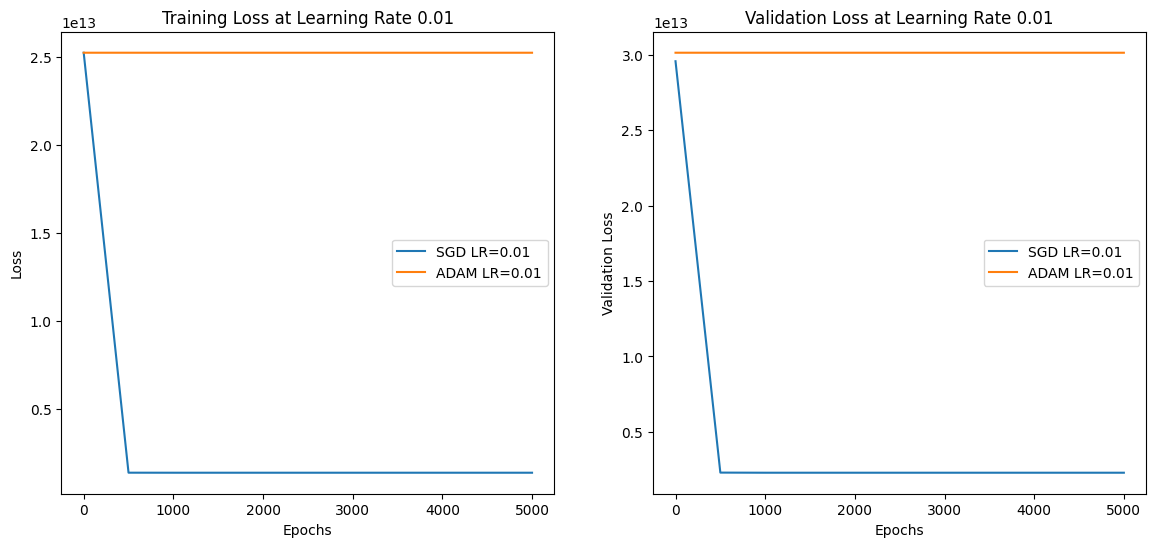

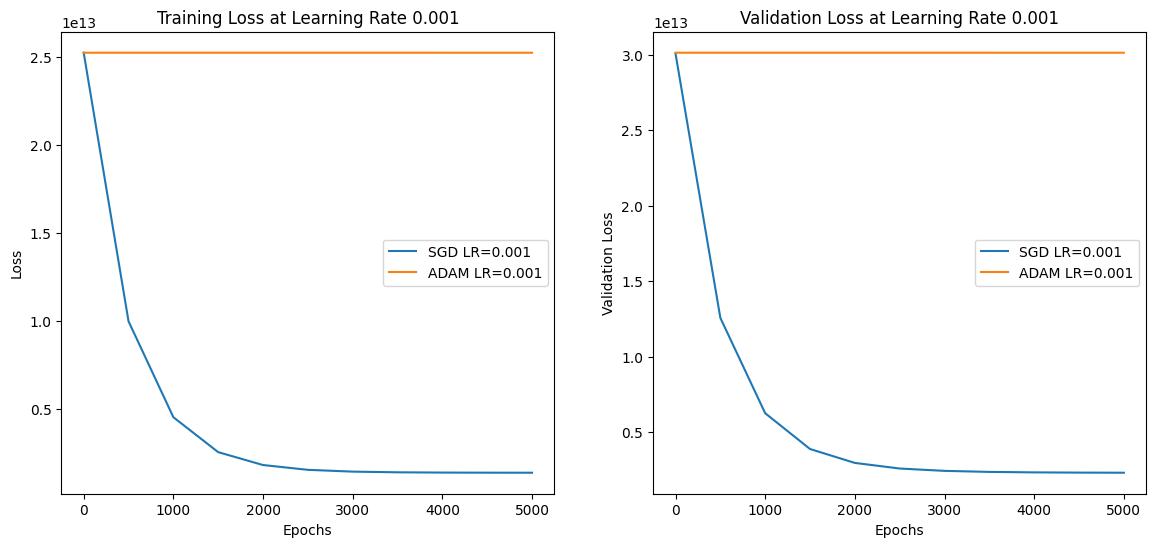

Best model parameters: [49.99993479 49.99937392 49.99886437 49.99908337 49.99896814 49.99908282]


In [9]:
#Problem 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and preprocess the dataset
df = pd.read_csv('Housing.csv')
df.fillna(df.mean(), inplace=True)  # Fill NaN with mean for simplicity
X = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
y = df['price'].values

# Normalize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Add a column of ones to include the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_val = np.c_[np.ones(X_val.shape[0]), X_val]

# Define the linear regression model
class LinearRegressionModel:
    def __init__(self):
        self.params = None

    def predict(self, X):
        return np.dot(X, self.params)

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

# Define the Adam optimizer
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m = None
        self.v = None
        self.t = 0
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

    def update(self, params, gradients):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * gradients
        self.v = self.beta2 * self.v + (1 - self.beta2) * (gradients ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        updated_params = params - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return updated_params

# Define the training function
def train(X, y, epochs, learning_rate, optimizer='sgd'):
    model = LinearRegressionModel()
    model.params = np.zeros(X.shape[1])
    loss_history = []
    val_loss_history = []
    if optimizer == 'adam':
        adam = AdamOptimizer(learning_rate)

    for epoch in range(epochs):
        predictions = model.predict(X)
        errors = predictions - y
        gradients = X.T.dot(errors) / len(y)

        if optimizer == 'sgd':
            model.params -= learning_rate * gradients
        elif optimizer == 'adam':
            model.params = adam.update(model.params, gradients)

        if epoch % 500 == 0 or epoch == epochs - 1:
            train_loss = model.mse(y, predictions)
            val_loss = model.mse(y_val, model.predict(X_val))
            loss_history.append(train_loss)
            val_loss_history.append(val_loss)

    return model.params, loss_history, val_loss_history

# Set hyperparameters and train the models
epochs = 5000
learning_rates = [0.01, 0.001]
best_model = None
best_val_loss = float('inf')

for lr in learning_rates:
    sgd_params, sgd_loss, sgd_val_loss = train(X_train, y_train, epochs, lr, 'sgd')
    adam_params, adam_loss, adam_val_loss = train(X_train, y_train, epochs, lr, 'adam')

    epoch_intervals = np.arange(0, epochs + 1, 500)

    # Plot training and validation loss
    plt.figure(figsize=(14, 6))

    # Plot SGD Losses
    plt.subplot(1, 2, 1)
    plt.plot(epoch_intervals, sgd_loss, label=f'SGD LR={lr}')
    plt.plot(epoch_intervals, adam_loss, label=f'ADAM LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training Loss at Learning Rate {lr}')
    plt.legend()

    # Plot Validation Losses
    plt.subplot(1, 2, 2)
    plt.plot(epoch_intervals, sgd_val_loss, label=f'SGD LR={lr}')
    plt.plot(epoch_intervals, adam_val_loss, label=f'ADAM LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.title(f'Validation Loss at Learning Rate {lr}')
    plt.legend()

    plt.show()

    # Check for best model based on validation loss
    if min(adam_val_loss) < best_val_loss:
        best_val_loss = min(adam_val_loss)
        best_model = adam_params

# Print the best model parameters
print(f"Best model parameters: {best_model}")


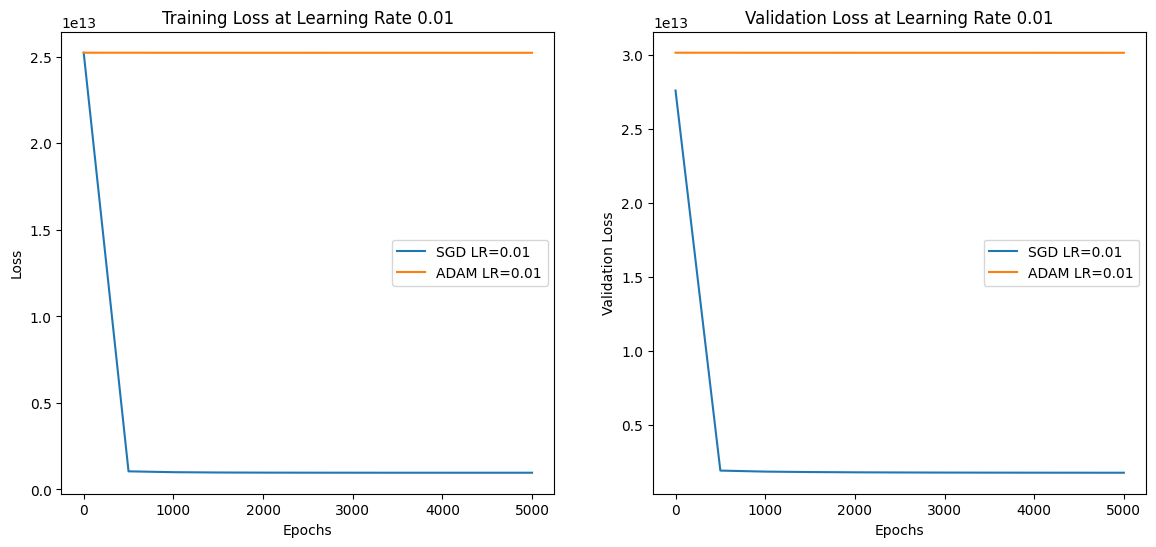

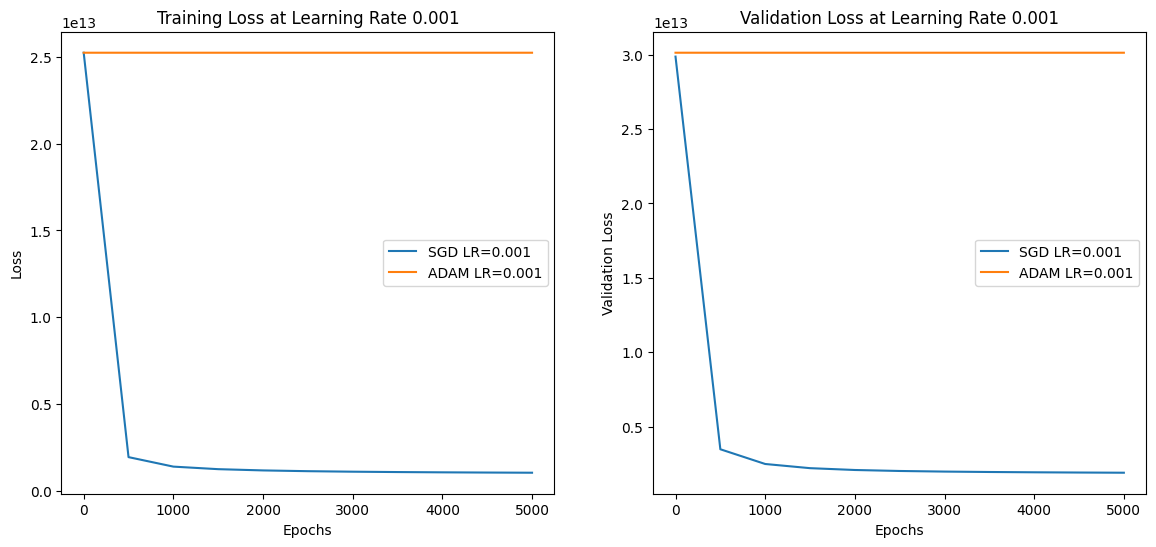

Best model parameters: [49.99943687 49.99936986 49.99889731 49.99921818 49.99907792 49.99911722
 49.99937877 49.99944351 49.99942457 49.99948132 49.99940688 49.99948284
 49.99943565 49.99945706 49.99942342 49.99945804 49.99941588 49.99949046
 49.99945317 49.99944033 49.99941324]


In [10]:
#Problem 3: All Housing Features

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load and preprocess the dataset
df = pd.read_csv('Housing.csv')

# Fill NaN values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.drop('price')

# Define the column transformer for preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(), categorical_cols)
])

# Separate features and target variable
X = df.drop('price', axis=1)
y = df['price'].values

# Apply transformations to the feature set
X_processed = preprocessor.fit_transform(X)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Add a column of ones to include the intercept term
X_train = np.c_[np.ones(X_train.shape[0]), X_train]
X_val = np.c_[np.ones(X_val.shape[0]), X_val]

# Define the linear regression model
class LinearRegressionModel:
    def __init__(self):
        self.params = None

    def predict(self, X):
        return np.dot(X, self.params)

    def mse(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

# Define the Adam optimizer
class AdamOptimizer:
    def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
        self.m = None
        self.v = None
        self.t = 0
        self.learning_rate = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon

    def update(self, params, gradients):
        if self.m is None:
            self.m = np.zeros_like(params)
            self.v = np.zeros_like(params)

        self.t += 1
        self.m = self.beta1 * self.m + (1 - self.beta1) * gradients
        self.v = self.beta2 * self.v + (1 - self.beta2) * (gradients ** 2)
        m_hat = self.m / (1 - self.beta1 ** self.t)
        v_hat = self.v / (1 - self.beta2 ** self.t)
        updated_params = params - self.learning_rate * m_hat / (np.sqrt(v_hat) + self.epsilon)
        return updated_params

# Define the training function
def train(X, y, epochs, learning_rate, optimizer='sgd'):
    model = LinearRegressionModel()
    model.params = np.zeros(X.shape[1])
    loss_history = []
    val_loss_history = []
    if optimizer == 'adam':
        adam = AdamOptimizer(learning_rate)

    for epoch in range(epochs):
        predictions = model.predict(X)
        errors = predictions - y
        gradients = X.T.dot(errors) / len(y)

        if optimizer == 'sgd':
            model.params -= learning_rate * gradients
        elif optimizer == 'adam':
            model.params = adam.update(model.params, gradients)

        if epoch % 500 == 0 or epoch == epochs - 1:
            train_loss = model.mse(y, predictions)
            val_loss = model.mse(y_val, model.predict(X_val))
            loss_history.append(train_loss)
            val_loss_history.append(val_loss)

    return model.params, loss_history, val_loss_history

# Set hyperparameters and train the models
epochs = 5000
learning_rates = [0.01, 0.001]
best_model = None
best_val_loss = float('inf')

for lr in learning_rates:
    sgd_params, sgd_loss, sgd_val_loss = train(X_train, y_train, epochs, lr, 'sgd')
    adam_params, adam_loss, adam_val_loss = train(X_train, y_train, epochs, lr, 'adam')

    epoch_intervals = np.arange(0, epochs + 1, 500)

    # Plot training and validation loss
    plt.figure(figsize=(14, 6))

    # Plot SGD Losses
    plt.subplot(1, 2, 1)
    plt.plot(epoch_intervals, sgd_loss, label=f'SGD LR={lr}')
    plt.plot(epoch_intervals, adam_loss, label=f'ADAM LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training Loss at Learning Rate {lr}')
    plt.legend()

    # Plot Validation Losses
    plt.subplot(1, 2, 2)
    plt.plot(epoch_intervals, sgd_val_loss, label=f'SGD LR={lr}')
    plt.plot(epoch_intervals, adam_val_loss, label=f'ADAM LR={lr}')
    plt.xlabel('Epochs')
    plt.ylabel('Validation Loss')
    plt.title(f'Validation Loss at Learning Rate {lr}')
    plt.legend()

    plt.show()

    # Check for best model based on validation loss
    if min(adam_val_loss) < best_val_loss:
        best_val_loss = min(adam_val_loss)
        best_model = adam_params

# Print the best model parameters
print(f"Best model parameters: {best_model}")

